In [44]:
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [45]:
dataSet = pandas.read_csv("data/encoed_Loan_Default.csv")
# dataSet = pandas.read_csv("data/encoded_loan_data_train.csv")

In [46]:
dataSet = dataSet.drop(columns= "LoanID")

In [47]:
print(dataSet["Default"].value_counts())

Default
0    225694
1     29653
Name: count, dtype: int64


In [48]:
# Not using it anymore
# hasDefault = dataSet[dataSet["Default"] == 1]
# noDefault = dataSet[dataSet["Default"] == 0]

# balaced_noDefault = resample(noDefault, replace=False, n_samples=len(hasDefault), random_state=1000,)

# dataSet = pandas.concat([balaced_noDefault, hasDefault])
# print(dataSet["Default"].value_counts())

In [49]:
x = dataSet.drop(columns=["Default"])
y = dataSet["Default"]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
columnsToScale = ["Age","Income","LoanAmount",
                  "CreditScore","MonthsEmployed",
                  "NumCreditLines","InterestRate"
                  ,"LoanTerm","DTIRatio"]

In [52]:
scaler = StandardScaler()
# x[columnsToScale]= scaler.fit_transform(x[columnsToScale])
x_train.loc[:, columnsToScale] = scaler.fit_transform(x_train[columnsToScale])
x_test.loc[:, columnsToScale] = scaler.transform(x_test[columnsToScale])

/tmp/ipykernel_1413/139737715.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.69983849  0.2341196  -1.16633281 ...  1.23444275  0.03405497
 -0.49945071]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_train.loc[:, columnsToScale] = scaler.fit_transform(x_train[columnsToScale])
/tmp/ipykernel_1413/139737715.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.41378519 -0.64983114  0.04676966 ... -1.23573162  1.63677754
  0.39376075]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_train.loc[:, columnsToScale] = scaler.fit_transform(x_train[columnsToScale])
/tmp/ipykernel_1413/139737715.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.15148725 -1.71586596 -0.4584369  ... -

/tmp/ipykernel_1413/1861104244.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('coolwarm')


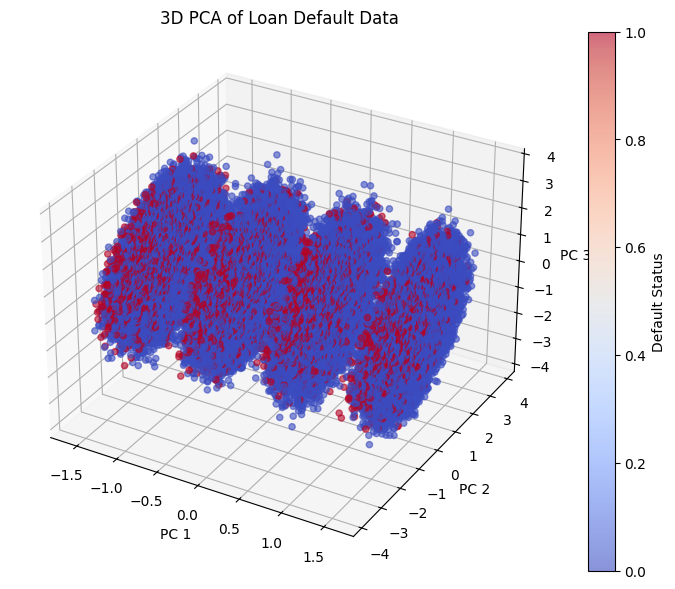

In [53]:
pca3 = PCA(n_components = 3)
x_pca3 = pca3.fit_transform(x_train)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colormap = plt.cm.get_cmap('coolwarm')

scatter = ax.scatter(x_pca3[:,0], x_pca3[:,1], x_pca3[:,2], c=y_train, cmap=colormap, alpha=0.6)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.title('3D PCA of Loan Default Data')
plt.colorbar(scatter, label='Default Status')
plt.show()

In [54]:
# svm = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
svm = LinearSVC(dual=False, random_state=42)

In [55]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'class_weight': ['balanced', None],
    'max_iter': [100, 500, 1000]
}

In [56]:
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

In [57]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ........C=0.01, class_weight=balanced, max_iter=100; total time=   1.6s
[CV] END ........C=0.01, class_weight=balanced, max_iter=500; total time=   1.7s
[CV] END ........C=0.01, class_weight=balanced, max_iter=500; total time=   1.7s
[CV] END ........C=0.01, class_weight=balanced, max_iter=500; total time=   1.8s
[CV] END ........C=0.01, class_weight=balanced, max_iter=100; total time=   1.8s
[CV] END .......C=0.01, class_weight=balanced, max_iter=1000; total time=   1.8s
[CV] END ........C=0.01, class_weight=balanced, max_iter=500; total time=   1.8s
[CV] END .......C=0.01, class_weight=balanced, max_iter=1000; total time=   1.8s
[CV] END .......C=0.01, class_weight=balanced, max_iter=1000; total time=   1.8s
[CV] END ........C=0.01, class_weight=balanced, max_iter=100; total time=   2.0s
[CV] END ........C=0.01, class_weight=balanced, max_iter=100; total time=   2.0s
[CV] END ........C=0.01, class_weight=balanced,

,estimator,LinearSVC(dua...ndom_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': ['balanced', None], 'max_iter': [100, 500, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [58]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation F1 Score: ", grid_search.best_score_)

Best Parameters:  {'C': 1, 'class_weight': 'balanced', 'max_iter': 100}
Best Cross-Validation F1 Score:  0.3296520729214051


In [59]:
best_svm = grid_search.best_estimator_

In [60]:
y_pred = best_svm.predict(x_test)
y_scores = best_svm.decision_function(x_test)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.67      0.79     45170
           1       0.22      0.70      0.33      5900

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.73     51070



[[30426 14744]
 [ 1786  4114]]


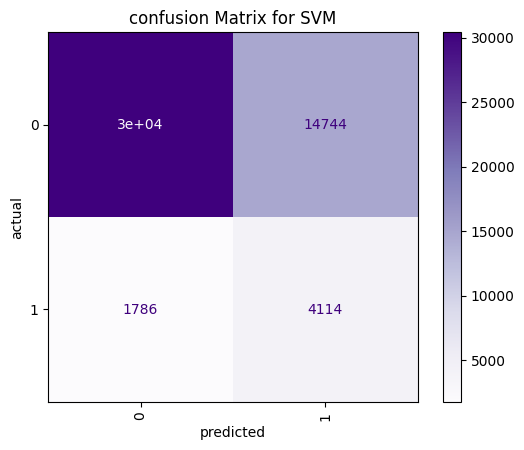

In [63]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm.classes_)
disp.plot(include_values=True, cmap='Purples', ax=None, xticks_rotation='vertical')
plt.title("confusion Matrix for SVM")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [ ]:
auc_score = roc_auc_score(y_test, y_scores)
print(f"ROC AUC Score: ", auc_score)

ROC AUC Score:  0.752813217862463
